In [1]:
# !pip install textblob

In [2]:
import pandas as pd
from textblob import TextBlob

# Cargar el archivo CSV
file_path = 'netflix_reviews.csv'
df = pd.read_csv(file_path)

# Asegurarse de que los valores en la columna 'content' sean cadenas de texto
df['content'] = df['content'].astype(str)

# Definir una función para obtener el sentimiento de cada reseña
def get_sentiment(text):
    analysis = TextBlob(text)
    # Devuelve la polaridad del sentimiento
    return analysis.sentiment.polarity

# Aplicar la función de sentimiento a la columna 'content'
df['sentiment'] = df['content'].apply(get_sentiment)

# Mostrar las primeras filas con la nueva columna de sentimiento
print(df[['content', 'sentiment']].head())

                                             content  sentiment
0                                         I loved it        0.7
1  Won't update. All I want it to watch netflix o...        0.0
2                      App is filled with game adds.        0.0
3                                            Love it        0.5
4                                  Just lost in t.v.        0.0


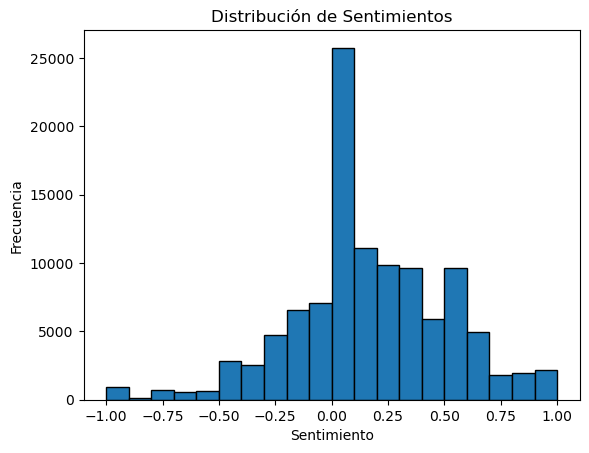

In [3]:
import matplotlib.pyplot as plt

# Histograma de los sentimientos
plt.hist(df['sentiment'], bins=20, edgecolor='black')
plt.title('Distribución de Sentimientos')
plt.xlabel('Sentimiento')
plt.ylabel('Frecuencia')
plt.show()


In [4]:
def classify_sentiment(polarity):
    if polarity > 0:
        return 'positivo'
    elif polarity < 0:
        return 'negativo'
    else:
        return 'neutro'

df['sentiment_class'] = df['sentiment'].apply(classify_sentiment)

# Contar la frecuencia de cada clase de sentimiento
sentiment_counts = df['sentiment_class'].value_counts()
print(sentiment_counts)


positivo    66530
negativo    26747
neutro      16293
Name: sentiment_class, dtype: int64


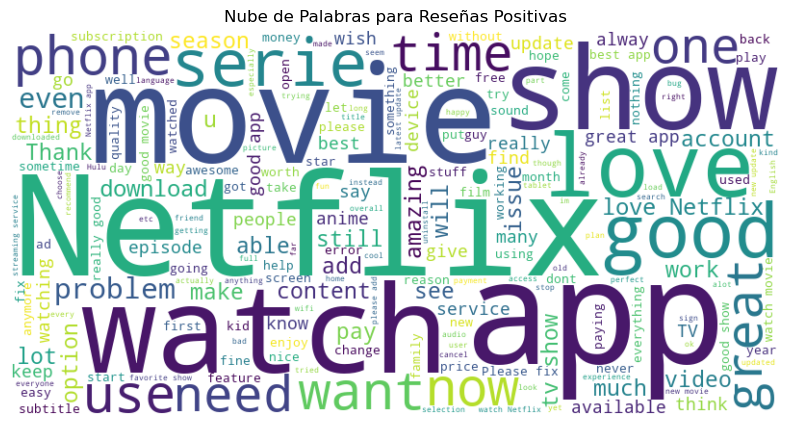

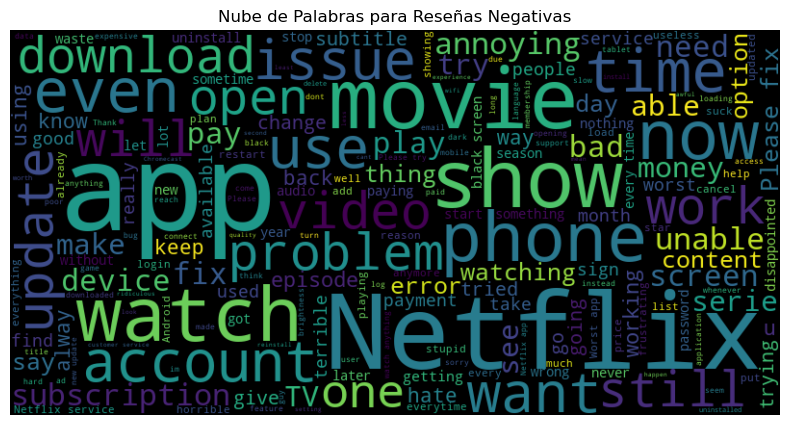

In [5]:
from wordcloud import WordCloud

# Generar una nube de palabras para las reseñas positivas
positive_reviews = df[df['sentiment'] > 0]['content']
positive_text = ' '.join(positive_reviews)
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras para Reseñas Positivas')
plt.show()

# Generar una nube de palabras para las reseñas negativas
negative_reviews = df[df['sentiment'] < 0]['content']
negative_text = ' '.join(negative_reviews)
wordcloud_negative = WordCloud(width=800, height=400, background_color='black').generate(negative_text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras para Reseñas Negativas')
plt.show()


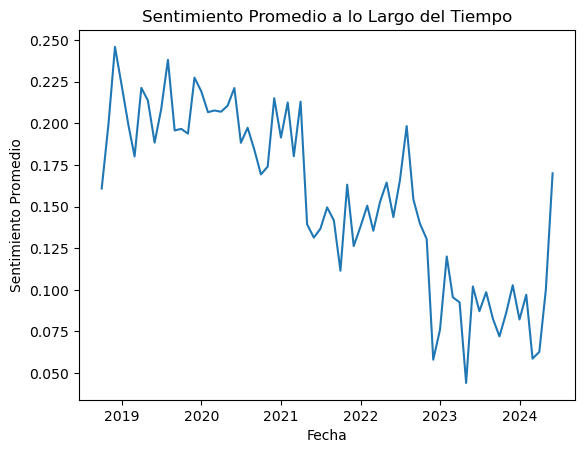

In [6]:
# Convertir la columna de fecha a tipo datetime
df['at'] = pd.to_datetime(df['at'])

# Agrupar por fecha y calcular el sentimiento promedio
sentiment_over_time = df.resample('M', on='at')['sentiment'].mean()

# Plot de sentimiento promedio a lo largo del tiempo
plt.plot(sentiment_over_time)
plt.title('Sentimiento Promedio a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Sentimiento Promedio')
plt.show()


In [7]:
df.dtypes

reviewId                        object
userName                        object
content                         object
score                            int64
thumbsUpCount                    int64
reviewCreatedVersion            object
at                      datetime64[ns]
appVersion                      object
sentiment                      float64
sentiment_class                 object
dtype: object

In [8]:
df.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion,sentiment,sentiment_class
0,818dc126-6a05-4a43-85d7-5f7c881837ff,John Khlbash,I loved it,5,0,8.114.0 build 19 50680,2024-05-20 22:54:23,8.114.0 build 19 50680,0.7,positivo
1,8c35de99-cf68-470b-98b5-be9c3ea79b46,Michael,Won't update. All I want it to watch netflix o...,1,0,8.103.0 build 8 50614,2024-05-20 22:15:05,8.103.0 build 8 50614,0.0,neutro
2,5bdb9562-f122-40f3-bdd5-7185569770d2,A.J. S.,App is filled with game adds.,1,0,8.114.0 build 19 50680,2024-05-20 21:53:28,8.114.0 build 19 50680,0.0,neutro
3,4f3ed413-6208-4428-9056-5def75fab561,shaneka johnson,Love it,5,0,8.114.0 build 19 50680,2024-05-20 21:46:50,8.114.0 build 19 50680,0.5,positivo
4,059ca0a8-928c-4621-874d-7ee5ed4532e4,Mark Edwards,Just lost in t.v.,3,0,8.96.1 build 16 50568,2024-05-20 21:32:18,8.96.1 build 16 50568,0.0,neutro


In [9]:
df.shape

(109570, 10)

In [11]:
from collections import Counter
import re
from nltk.corpus import stopwords
import nltk

# Descargar el conjunto de stopwords
nltk.download('stopwords')

# Lista de stopwords en inglés
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convertir a minúsculas y eliminar caracteres especiales
    text = text.lower()
    text = re.sub(r'\W+', ' ', text)
    # Eliminar stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Filtrar reseñas positivas, negativas y neutras
positive_reviews = df[df['sentiment'] > 0]['content'].apply(preprocess_text)
negative_reviews = df[df['sentiment'] < 0]['content'].apply(preprocess_text)
neutral_reviews = df[df['sentiment'] == 0]['content'].apply(preprocess_text)

# Contar la frecuencia de palabras
positive_words = ' '.join(positive_reviews).split()
negative_words = ' '.join(negative_reviews).split()
neutral_words = ' '.join(neutral_reviews).split()

positive_freq = Counter(positive_words)
negative_freq = Counter(negative_words)
neutral_freq = Counter(neutral_words)

# Mostrar las 10 palabras más comunes para cada categoría
print('Palabras más comunes en reseñas positivas:')
print(positive_freq.most_common(10))
print('\nPalabras más comunes en reseñas negativas:')
print(negative_freq.most_common(10))
print('\nPalabras más comunes en reseñas neutrales:')
print(neutral_freq.most_common(10))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Palabras más comunes en reseñas positivas:
[('netflix', 32058), ('app', 30493), ('movies', 22480), ('watch', 17923), ('good', 16548), ('shows', 16000), ('love', 13496), ('like', 12157), ('great', 10974), ('series', 7274)]

Palabras más comunes en reseñas negativas:
[('app', 12893), ('netflix', 12214), ('watch', 5370), ('please', 3667), ('movies', 3625), ('even', 3572), ('phone', 3321), ('shows', 3183), ('like', 3148), ('time', 2955)]

Palabras más comunes en reseñas neutrales:
[('app', 6036), ('netflix', 5395), ('please', 2234), ('watch', 2080), ('phone', 1817), ('fix', 1718), ('open', 1674), ('even', 1574), ('working', 1513), ('error', 1429)]
